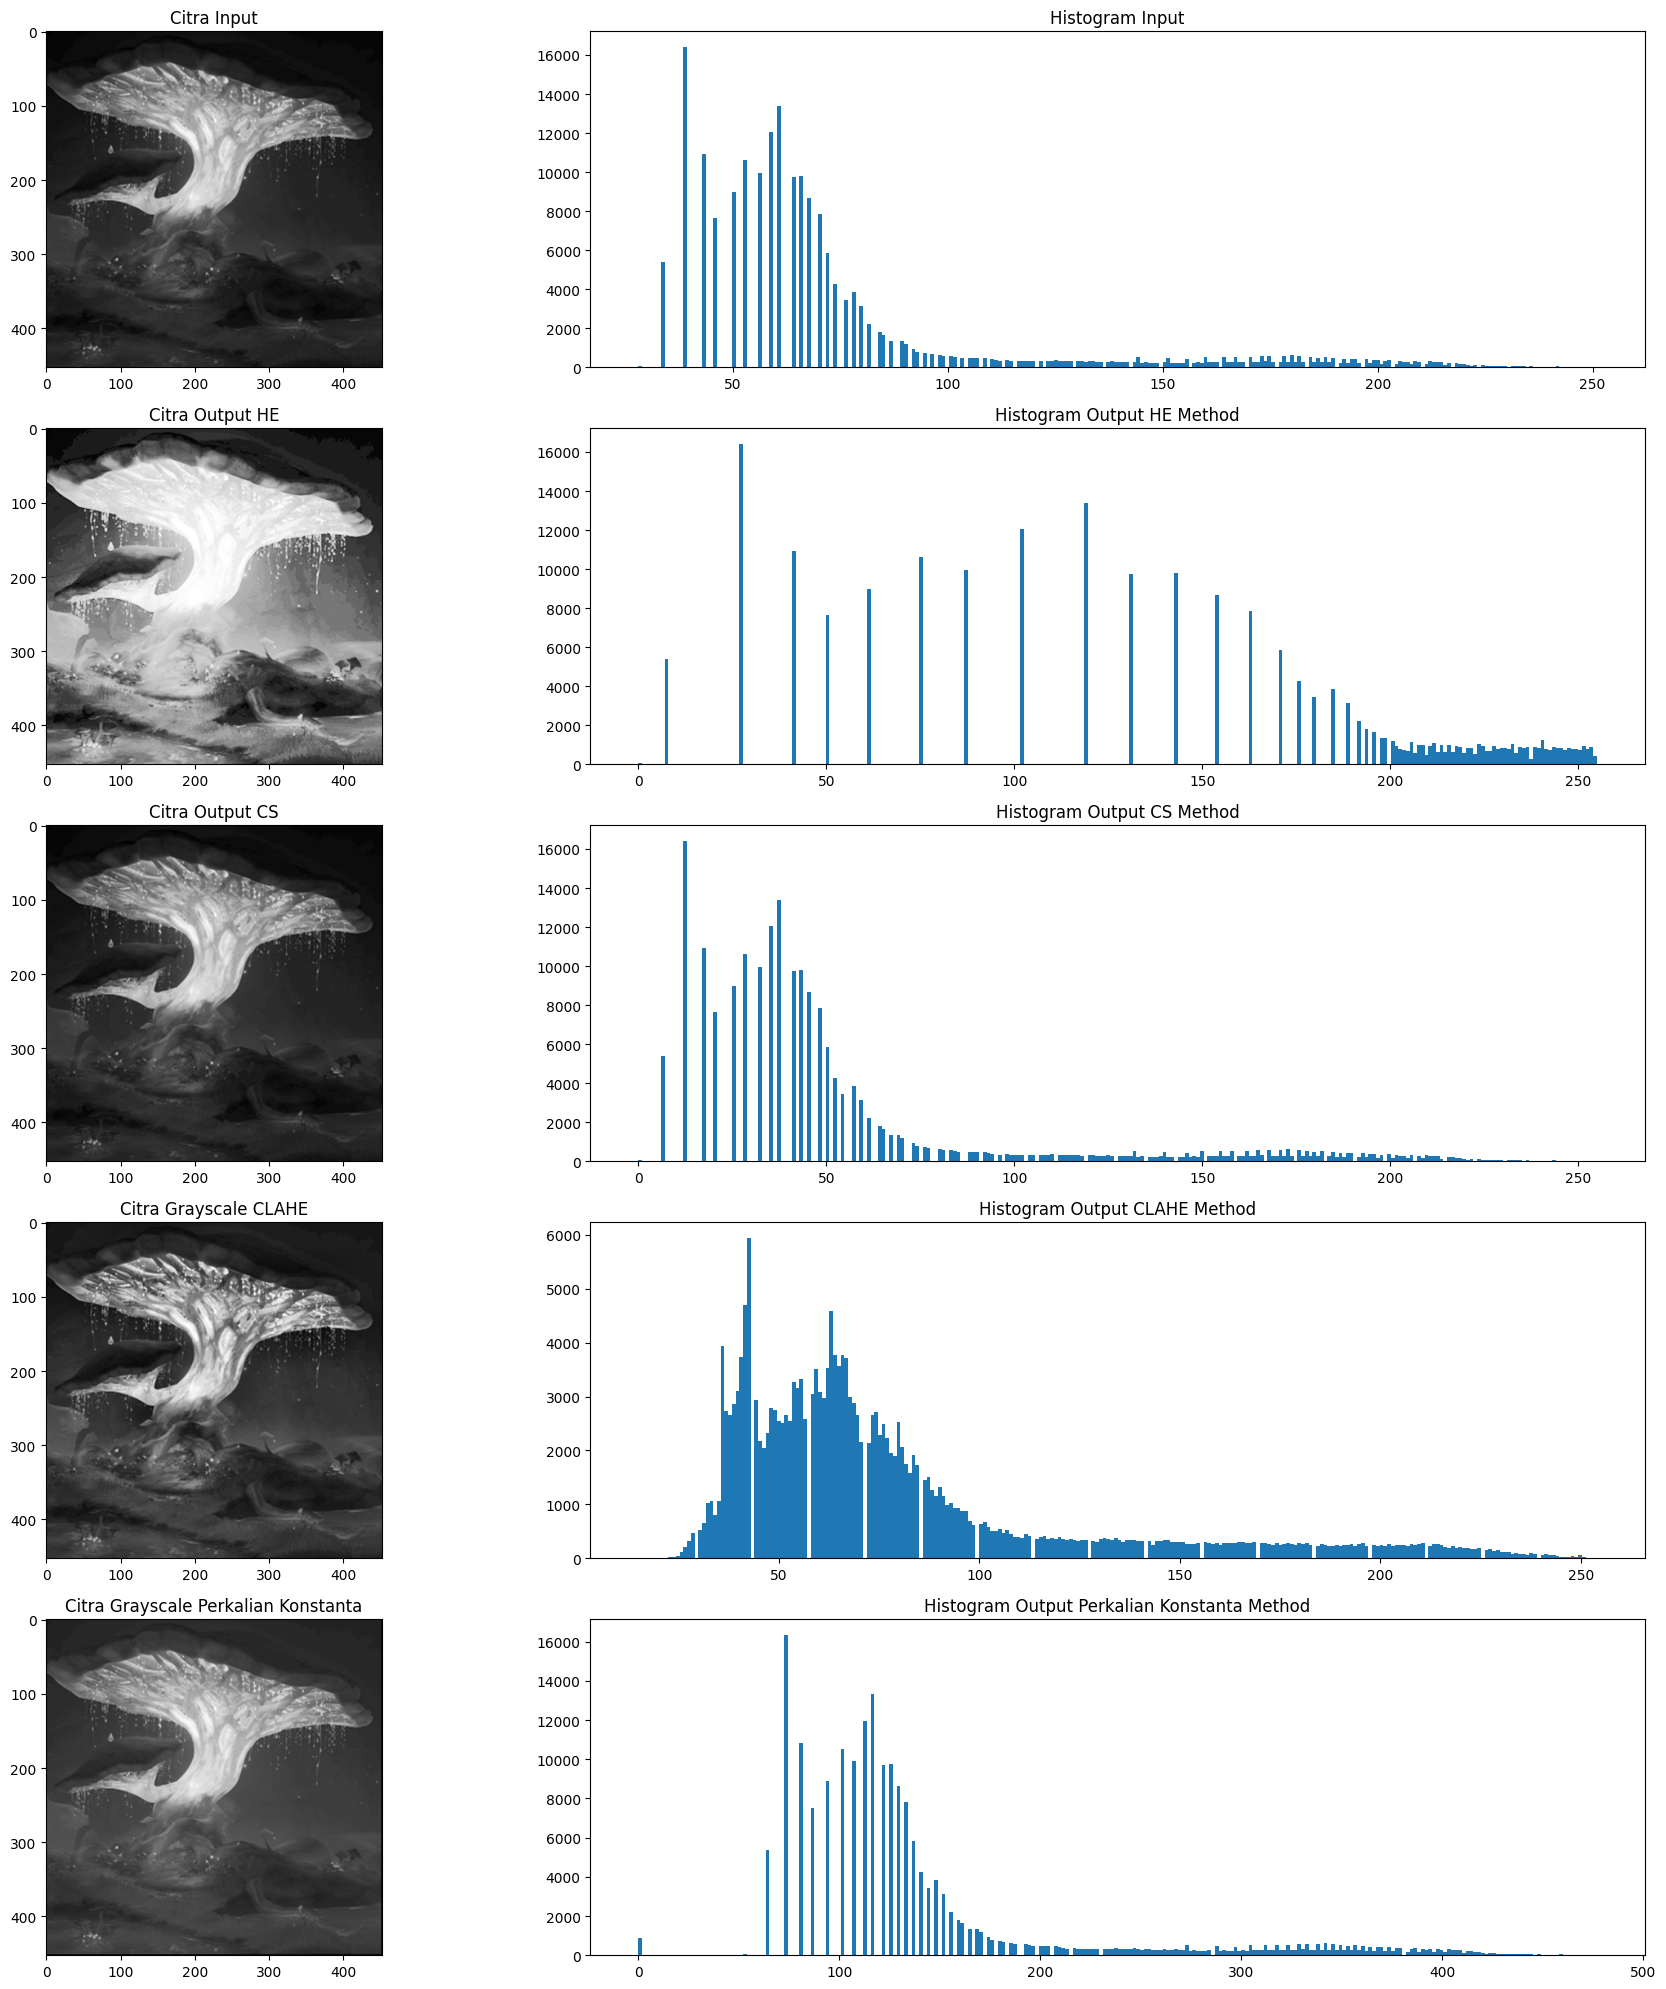

In [1]:
#NAMA : JIHAD NATRA SITUMORANG
#NIM  : 1207070061
#KELAS: TSEB
#=============================================================================================================

#IMPORT LIBRARY

import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from skimage import data
#Membaca Gambar
img = cv2.imread('D:\Belajar Python\Praktikum 7\SourceImage\Jamur.jpg',cv2.IMREAD_GRAYSCALE)

#Penerapan Histogram Equalization (HE)
img_equalized = cv2.equalizeHist(img)

#Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#Apply CLAHE to the original image
img_clahe = clahe.apply(img)

#Penerapan metode Contrast Stretching (CS)

# Membuat Array kosong untuk menyimpan hasil akhir
img_cs = np.zeros((img.shape[0],img.shape[1]),dtype = 'uint8')

# Apply Min-Max Contrasting
min = np.min(img)
max = np.max(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_cs[i,j] = 255*(img[i,j]-min)/(max-min)

# Penerapan Metode Perkalian Konstanta
copyCamera = img.copy().astype(float)

m1,n1 = copyCamera.shape
output1 = np.empty([m1, n1])

for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9


#Plot Image
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)# memunculkan modul gambar ori pada aray 0
ax[0].set_title("Citra Input")#memasang judul Citra input pada aray 0
ax[1].hist(img.ravel(), bins=256)# memunculkan modul histogram gambar ori
ax[1].set_title('Histogram Input')#memasang judul pada plot

ax[2].imshow(img_equalized, cmap=plt.cm.gray)# memunculkan modul gambar HE  pada aray 2 
ax[2].set_title("Citra Output HE")#memasang judul Citra Output HE pada aray 2
ax[3].hist(img_equalized.ravel(), bins=256) #memunculkan modul histogram HE Method
ax[3].set_title('Histogram Output HE Method')#memasang judul pada plot

ax[4].imshow(img_cs, cmap=plt.cm.gray)# memunculkan modul gambar CS  pada aray 4
ax[4].set_title("Citra Output CS")#memasang judul Citra Output CS pada aray 4
ax[5].hist(img_cs.ravel(), bins=256)# memunculkan modul histogram CS Method
ax[5].set_title('Histogram Output CS Method')#memasang judul pada plot

ax[6].imshow(img_clahe, cmap=plt.cm.gray)# memunculkan modul gambar CLAHE pada aray 6 
ax[6].set_title("Citra Grayscale CLAHE")#memasang judul Citra Grayscale CLAHE pada aray 6 
ax[7].hist(img_clahe.ravel(), bins=256)# memunculkan modul histogram CLAHE Method
ax[7].set_title('Histogram Output CLAHE Method')#memasang judul pada plot

ax[8].imshow(output1, cmap=plt.cm.gray)# memunculkan modul gambar Output1 pada aray 8
ax[8].set_title("Citra Grayscale Perkalian Konstanta")#memasang judul Citra Grayscale Perkalian Konstanta pada aray 8
ax[9].hist(output1.ravel(), bins=256)# memunculkan modul histogram Perkalian Konstanta Method
ax[9].set_title('Histogram Output Perkalian Konstanta Method')#memasang judul pada plot

fig.tight_layout()